In [ ]:
!pip3 install -U langchain-community
!pip3 install faiss


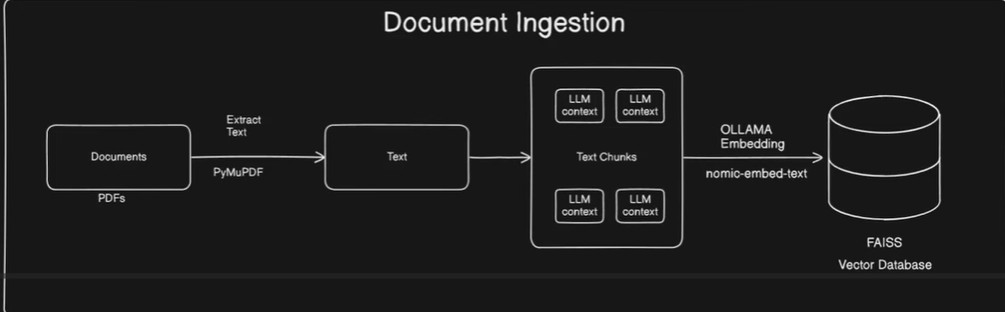

In [ ]:
from PIL import Image
Image.open(r'/content/Document_Ingestion.jpg')

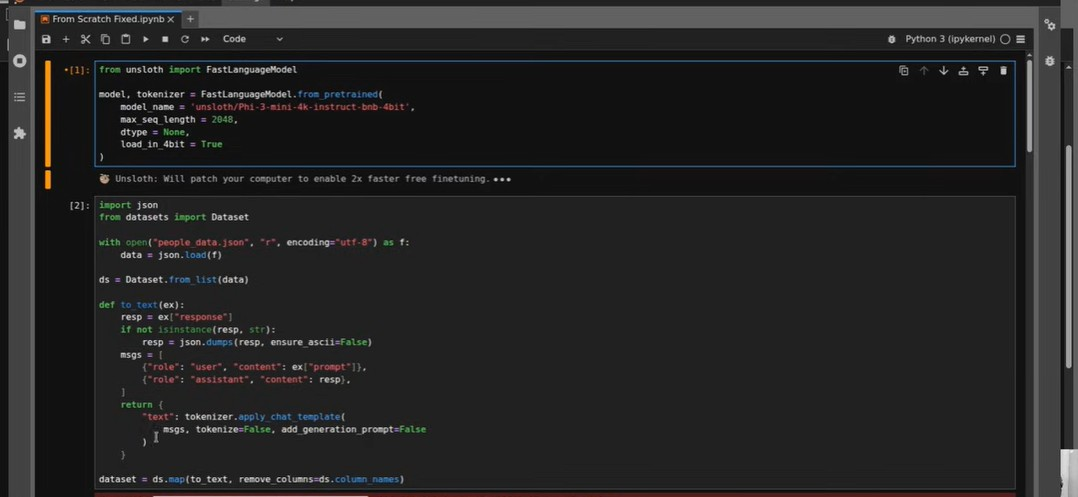

In [ ]:
Image.open(r'/content/Fine-Tuning Local LLMs with Unsloth & Ollama.jpg')

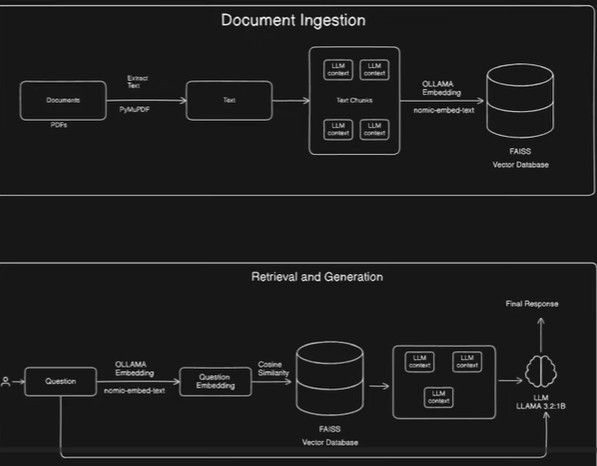

In [ ]:
Image.open(r'/content/parsing_generation.jpg')

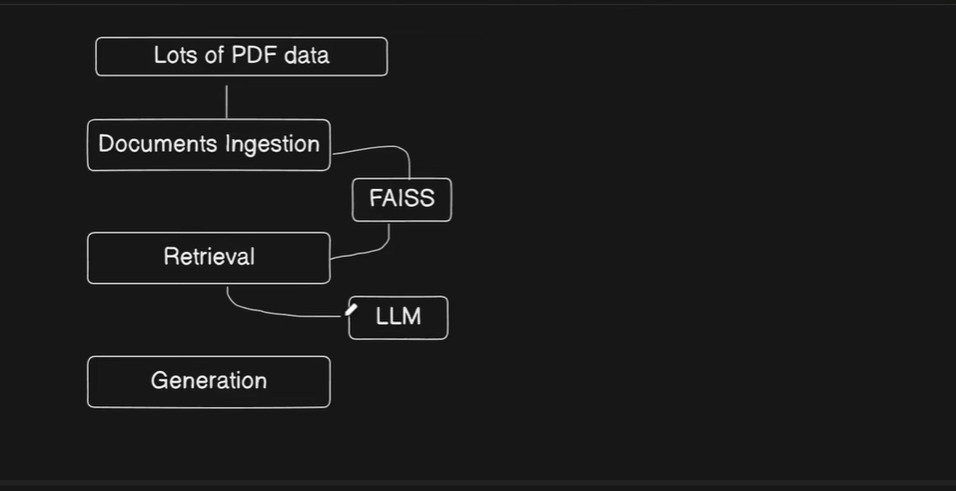

In [ ]:
Image.open(r'/content/private_chat_2.jpg')

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
from dotenv import load_dotenv
os.environ[]='True'
load_dotenv()


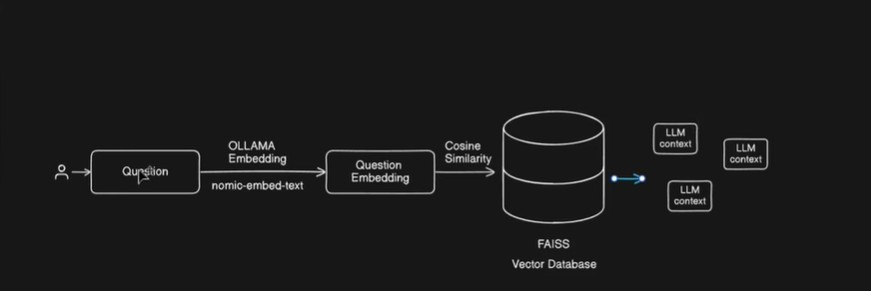

In [ ]:
from PIL import Image
Image.open(r'/content/arch_2.jpg')

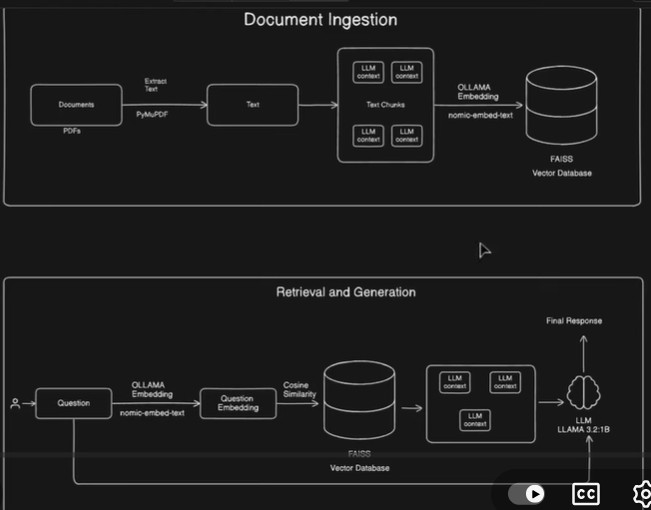

In [ ]:
Image.open(r'/content/document generationa and retrieval generation.jpg')

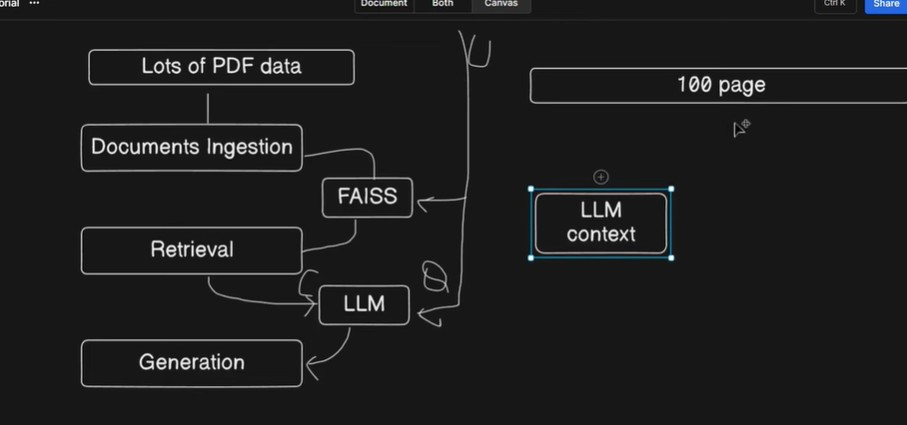

In [ ]:
Image.open(r'/content/LLM.jpg')

In [ ]:
## Langchain API Key

In [ ]:
LANGCHAIN_API_KEY=""
LANGCHAIN_ENDPOINT
LANGCHAIN_PROJECT
LAGNCHAIN_TRACKING_V2=TRUE

In [ ]:
## Document Loader

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader
loader=PyMuPDFLoader("Analysis of supplements.pdf")

In [ ]:
docs=loader.load()
docs=docs[0]
docs.metadata

In [ ]:
import os
pdfs=[]
from root,dirs,files in os.walk('rag-dataset'):
print(root,dirs,files)
for file in files:
  if file.endswith('.pdf'):
    pdfs.append(file)


In [ ]:
docs=[]
for pdf in pdfs:
  loader=PyMuPDFLoader(pdf)
  pages=loader.load()
  docs.extend(loader.load())
doc=loader.load()
docs.extend(pages)
len(docs)

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
with open('new_file.txt','r') as f:
  state_of_the_union=f.read()
text_splitter=text_splitter.split_text(state_of_the_union,chunck_size=100,chunck_overlap=20,length_function=len,is_sepearator_regex=False)
text=text_splitter.create_documents(texts)
print(text[0])
print(text[1])


In [ ]:
## Document Chuncking

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
chuncks=text_splitter.split_documents(docs)
len(docs),len(chuncks)
# print(docs[0].page_count())
len(docs[0].page_content),len(chuncks[0].page_content)

In [ ]:
import tiktoken
encoding=tiktoken.encoding_for_model('gpt-3.5-turbo')
encoding.encode("Hello World")

In [ ]:
## Document Vector Embedding

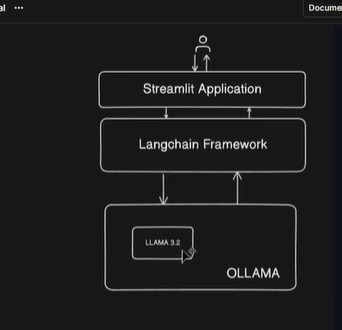

In [1]:
from PIL import Image
Image.open(r'/content/stream_lit.jpg')

In [ ]:
from langchain_ollama import OllamaEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.inMemory import inMemoryDocstore
import faiss
from langchain_community.document_loaders import PyMuPDFLoader
loader=PyMuPDFLoader("Analysis of supplements.pdf")
docs=loader.load()
index=faiss.IndexFlatL2(100)
index.ntotal,index.d
docstore=inMemoryDocstore()

In [ ]:
embeddings=OllamaEmbeddings(model="nomic-embed-text",base_url="http://localhost:11434")
single_vector=embeddings.embed_query("this is some text data")

In [ ]:
len(single_vector)

In [ ]:
vector_store=FAISS(embeddings,index,docstore,None,docstore=inMemoryDocstore(),index_to_docstore_id=[])
len(chucks)

In [ ]:
ids=vectorstore.add_documents(document=chucks)

In [ ]:
len(ids)

In [ ]:
vector_store.index_to_docstore_id

In [ ]:
db_name="health_supplements"
vector_store.save_local(db_name)
new_vector_store=FAISS.load_local(db_name,embedding=embeddings,allow_dangerous_deserialization=True)

In [ ]:
## retreival

In [ ]:
question='what is  used to gain muscle mass'
vector_store.search(query=question,search_type="similarity")
for doc in docs:
  print(doc.page_content)
  print('\n\n')

In [ ]:
retriever=vector_store.as_retriever(search_type="mmr",search_kwargs={"k":2})
docs=retriever.get_relevant_documents(question)
retriever.invoke(question)
for doc in docs:
  print(doc.page_content)
  print('\n\n')


In [ ]:
## RAG with llama2 on ollama

In [ ]:
from langchain import llm,hub
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_ollama import Ollama
from langchain_core.runnables import RunnablePassthrough

In [ ]:
model=ChatOllama(model="llama3.2:1b",base_url="http://localhost:11434")
model.invoke("hi")
prompt=hub.pull("rlm/rag-prompt")
prompt="""
You're an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question:{question}
=========
{context}
=========
Answer in Markdown:
"""
promt=ChatPrompt.from_template(prompt)
def format_docs(docs):
  return "\n\n".join(doc.page_content for doc in docs)
print(format_docs(docs))

In [ ]:
rag_chain=({"context":retriever|format_docs,"question":RunnablePassthrough()})|prompt|model|StrOutputParser()
output=rag_chain.invoke("what is  used to gain muscle mass")
print(output)
